Source : https://school.programmers.co.kr/learn/courses/30/lessons/92334

# 신고 결과 받기
> 제한 시간 : 10초

# 1. 문제 요약 정리


 $n$개의 id string이 주어지고, 이 n개의 id string 집합을 $ID$ 라고 할 때, $m$ 개의 report string이 주어진다. report string은 "A B" $(A, B \in ID)$ 의 형태를 지닌다.
 
"A B"는 A가 B를 지목하는 것을 의미하며, 이 관계는 둘 이상 카운트 되지 않는다.
 
각 id 마다 주어진 k 값을 넘도록 지목받은 id을 지목한 수를 구하여라.




## 제한사항

$ 2 \leq n \leq 1000 $.

$\forall A \in ID,  1 \leq A.length \leq 10$ and $A$ is unique and lowercase.

$ 1 \leq m \leq 200000$.

$A$ cannot indicate itself.

$ 1 \leq k \leq 200, k \in N$

## 출력

id_list에 담긴 순서대로 결과값을 저장

## Example
---
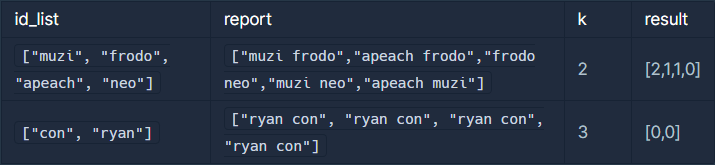

# 2. 문제 해결

### 해결 사고 과정

1) 문제의 요구사항은 문자열을 추출하고, 추출한 문자열의 index searching, 그리고 각 조건에 해당하는 index에 영향을 준 index를 참조
2) 먼저 index searching을 위해 시간을 줄여야했는데, 문제에서 id의 길이와 사용가능한 문자열에 대한 제한이 있어서 이에 대해 sort한 뒤, search 하는 것으로 했다. 특히 문제에서 id 길이가 지정되어있다는 점을 두고 radix sort를 사용했다.
3) 그리고 각 id 페어마다의 지목 여부를 저장하는 bool matrix를 생성한 뒤, k번 이상 지적을 받은 항목에 대해서 그에 영향을 준 값들을 찾았다.

### pseudo code

```python

input : 
    id_list <- list of id
    report <- list of report
    k 
output : 
    answer
    

def radix_sort(id_list)

    alphabet_bucket <- list of alphabet bucket (null and a to z)  # null for short word

    order_list <- list of (0 to n-1) # preserve id_list's order
    
    for i from max_length_of_ids - 1 to 0:
        
        for each order in order_list
            alphabet = id[order][i]
            alphabet_bucket[alphabet].append(order)
        
        clear order_list 
           
        for each bucket in alphabet_bucket:
            
            append bucket to order_list
            
    return order_list



def get_answer(id_list, report, k):
       
    answer <- n size list and init all 0
    
    order = radix_sort(id_list)
    
    for each rep in report:
        
        A, B = rep.split(" ")
        
        mtx[find(A)][find(B)] = True
    
        
    for i from 0 to n-1:
        
        if(mtx[ :, i].sum() >= k):
            
            for j from 0 to n-1:
                
                if mtx[j, i]:
                    
                    answer[j] ++;

    return answer;
            
            
            
       
```

# 3. 정답 코드

## [solution.cpp]


### find 부분은 정렬되었다는 점을 이용해 binary search $O(log n)$ 를 이용할 계획은 있었으나 linear seach $O(n)$으로도 문제가 해결되어 쓰지 않았다.


```c++

#include <string>
#include <vector>

using namespace std;

bool rpt_mtx[1000][1000];
int reported[1000];

void sort(vector<string> id_list, vector<int> &order, int max)
{

    vector<vector<int>> buckets;

    for (int i = 0; i < id_list.size(); i++)
    {
        order.push_back(i);
    }

    for (char i = 'a'; i <= 'z' + 1; i++)
    { // zero for null
        vector<int> alphabet;
        buckets.push_back(alphabet);
    }

    for (int i = max - 1; i >= 0; i--)
    {
        for (auto x : order)
        {
            if (id_list[x].size() > i)
            { // in range
                char alphabet = id_list[x][i];
                buckets[alphabet - 'a' + 1].push_back(x);
            }
            else
            { // out of range
                buckets[0].push_back(x);
            }
        }

        int count = 0;
        for (auto &bucket : buckets)
        {
            while (bucket.size())
            {
                order[count++] = *bucket.begin();
                bucket.erase(bucket.begin());
            }
        }
    }
}

int get_length_longest_word(vector<string> id_list)
{

    int n = id_list.size();

    int max = 0;

    for (auto x : id_list)
    {
        if (max < x.size())
            max = x.size();
    }
    return max;
}

vector<string> split(string s, char delim)
{

    vector<string> substrings;

    int position = s.find(delim);

    substrings.push_back(s.substr(0, position));
    substrings.push_back(s.substr(position + 1, s.length() - 1));
    return substrings;
}

int find(string id, const vector<string> &id_list, const vector<int> &order)
{

    for (const auto &x : order)
    {

        if (id_list[x].length() != id.length())
            continue;

        int i = 0;
        while ((id_list[x][i] == id[i]) && i < id.length())
            i++;

        if (i == id.length())
            return x;
    }
    return -1;
}

vector<int> solution(vector<string> id_list, vector<string> report, int k)
{

    vector<int> answer, order;

    int max, n;

    n = id_list.size();
    max = get_length_longest_word(id_list);

    // id_list sorting by radix
    sort(id_list, order, max);

    for (int i = 0; i < n; i++)
        answer.push_back(0);

    // get
    for (auto rep_s : report)
    {

        vector<string> rep = split(rep_s, ' ');

        int aIdx = find(rep[0], id_list, order);
        int bIdx = find(rep[1], id_list, order);

        if (!rpt_mtx[aIdx][bIdx])
        {
            rpt_mtx[aIdx][bIdx] = true;
            reported[bIdx]++;
        }
    }

    for (int i = 0; i < n; i++)
    {
        if (reported[i] >= k)
        {
            for (int j = 0; j < n; j++)
            {
                if (rpt_mtx[j][i])
                    answer[j]++;
            }
        }
    }

    return answer;
}
```